<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Proyectos

Proyectos propuestos para Python Analytics<br>
v1.5

### Formato de entrega
Toda la etapa de entrenamiento del proyecto se debe realizar en un colab o nootebook que luego el alumno subierá a su repositorio de proyecto para que el profesor pueda evaluar los avances.<br>

__APROBACIÓN:__ El proyecto será aprobado cuando el modelo entrenado alcance la exactitud/condición planteada en el proyecto.<br>

### Predicción de enfermedades cardíacas
<img src="https://github.com/InoveAlumnos/proyecto_analytics_python/raw/main/heart.png" width="300" align="center">

- El objetivo es armar un clasificador binario que permita predecir si un paciente podría presentar o no enfermedades cardíacas.
- Deberá entrenar un modelo clasificador y varios algoritmos para clasificación. Por ejemplo, en el caso de seleccionar un RandomForest debe entrenar con distinto número de estimadores (distantas cantidad de árboles), pero a su vez entrenar distintos KNN o regresión logística, etc. Deberá compararlos utilizando la métrica adecuada y elegir el mejor modelo.
- Entre el dataset encontrará datos categóricos que requieren ser codificados, y datos numéricos para normalizar.
- A modo de análisis, debe identificar si el dataset se encuentra correctamente balanceado (entre pacientes con y sin enfermedad cardíaca), y como está balanceado el dataset en cuanto a género y edad (este análisis es unicamente a modo informativo).

#### Objetivo

El accuracy del modelo definitivo debe superar el 80% (0.8)

#### Como descargar el dataset

In [75]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [76]:
# Ejecutar:
if os.access('heart.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv > heart.csv
    else:
        !wget heart.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv

In [77]:
#traemos el archivo .csv
dfheart = pd.read_csv('heart.csv')

Acontinuacion realizare una pequeña documentacion para orientarnos en la realizacion de este proyecto:

**age:** Edad del paciente.

**sex:** Sexo del paciente (0 = mujer, 1 = hombre).

**cp:** Tipo de dolor en el pecho (angina):

0: Angina típica

1: Angina atípica

2: Dolor no anginoso

3: Asintomático

**trestbps:** Presión arterial en reposo.

**chol:** Colesterol sérico.

**fbs:** Azúcar en sangre en ayunas (1 = verdadero; 0 = falso).

**restecg:** Resultados del electrocardiograma en reposo:

0: Normal

1: Anormalidad de onda ST-T

2: Hipertrofia ventricular izquierda probable o definitiva

**thalach:** Frecuencia cardíaca máxima alcanzada.

**exang:** Angina inducida por el ejercicio (1 = sí; 0 = no).

**oldpeak:** Depresión del ST inducida por el ejercicio en relación con el reposo.

**slope:** Pendiente del segmento ST del pico de ejercicio:

0: Ascendente

1: Plana

2: Descendente

**ca:** Número de vasos principales coloreados por fluoroscopia (0-3).

**thal:** Estado talasémico:

1: Normal

2: Defecto fijo

3: Defecto reversible

**target:** Variable objetivo (0 = ausencia de enfermedad cardíaca, 1 = presencia de enfermedad cardíaca).

Comenzamos con el proyecto:

**Comenzaremos realizando una limpieza de valores faltantes y una normalizacion de valiriables numericas/continuas, como la variable "trestbps", para transformarlas a variables categoricas**

In [78]:
#una vista del archivo
dfheart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Antes de pasar a realizar los modelos de clasificacion, realizaré una busqueda de valores faltantes, en este caso utilizaré una extension llamada "Data Wrangler" para optimizar la busqueda de valores faltantes.

Ahora comenzare a normalizar los datos.

comenzaremos obteniendo el valor minimo y maximo

In [79]:
#Valor minimo
dfheart['trestbps'].min()

94

In [80]:
#Valor Maximo
dfheart['trestbps'].max()

200

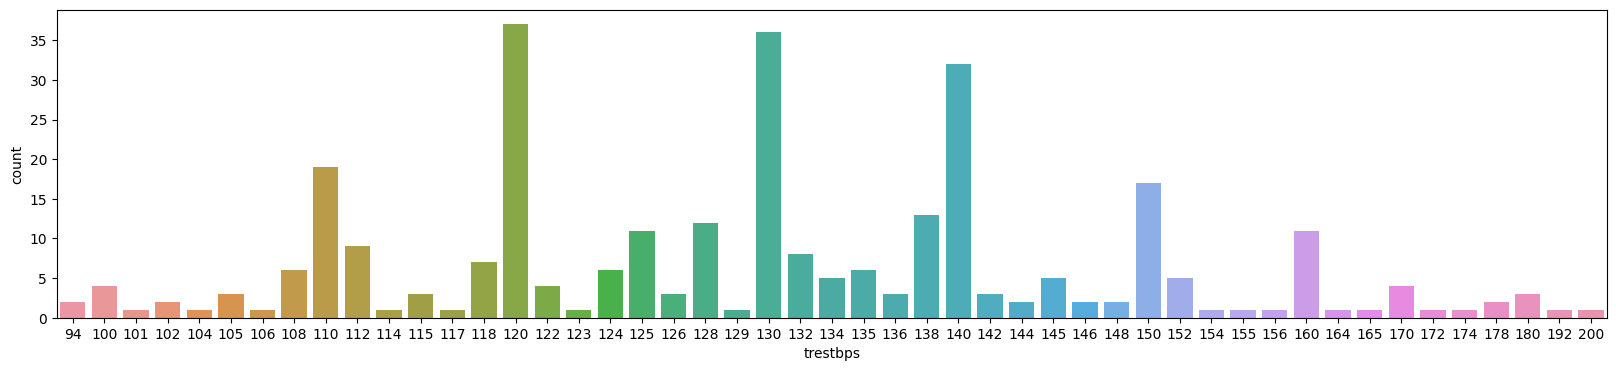

In [81]:
#realizaremos un barplot con la variable trestbps, esto nos permite visualizar la cantidad de variables repetidas con el mismo valor.
plt.figure(figsize=(20, 4))
sns.countplot(dfheart,x='trestbps')
plt.show()

Bien, tomando estos datos lo que realizare sera una normalizacion tal que:

0 = los valores debajo de 121

1 = los valores entre 121 y 139

2 = los valores mayores a 139

In [82]:
dfheart.loc[dfheart['trestbps'] <= 120, 'trestbps'] = 0

In [83]:
dfheart.loc[(dfheart['trestbps'] > 120) & (dfheart['trestbps'] < 140), 'trestbps']  = 1

In [84]:
dfheart.loc[dfheart['trestbps'] >= 140, 'trestbps'] = 2

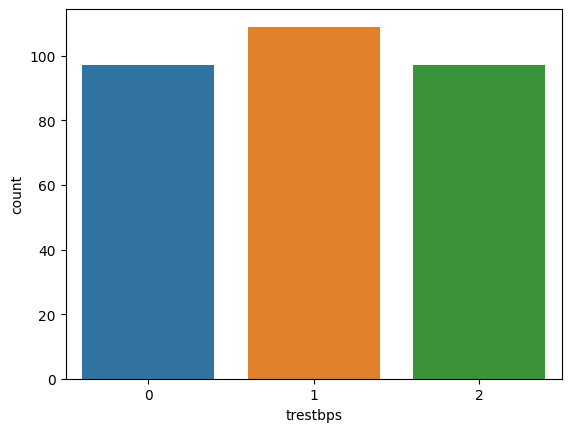

In [85]:
sns.countplot(dfheart,x='trestbps')
plt.show()

Una vez normalizados los datos de esta columna, pasaremos a normalizar los datos de la columna chol

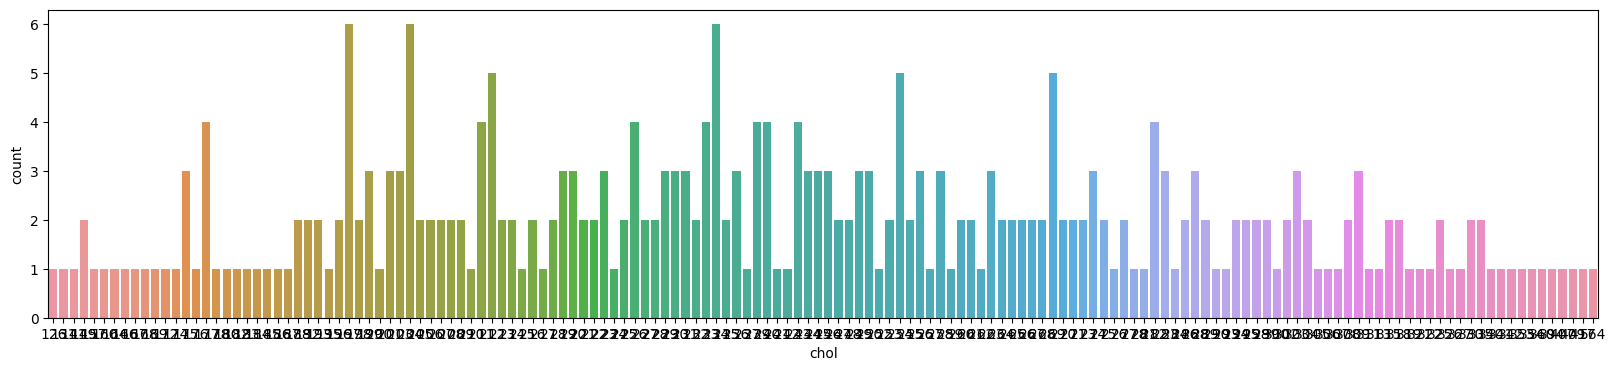

In [86]:
#realizamos un grafico para visualizar los datos
plt.figure(figsize=(20, 4))
sns.countplot(dfheart, x='chol')
plt.show()

vemos que tiene una gran cantidad de valores unicos, lo que haremos seria ver los valores minimos, maximos y la cantidad de valores.

In [87]:
dfheart['chol'].min()

126

In [88]:
dfheart['chol'].max()

564

In [89]:
dfheart['chol'].count()

303

comenzamos a normalizar los datos de la columna 'chol' de tal manera que:

0 = los valores debajo de 221

1 = los valores entre 121 y 279

2 = los valores mayores a 279

In [90]:
dfheart.loc[dfheart['chol'] <= 220, 'chol'] = 0

In [91]:
dfheart.loc[(dfheart['chol'] > 220) & (dfheart['chol'] < 280), 'chol'] = 1

In [92]:
dfheart.loc[dfheart['chol'] >= 280 , 'chol'] = 2

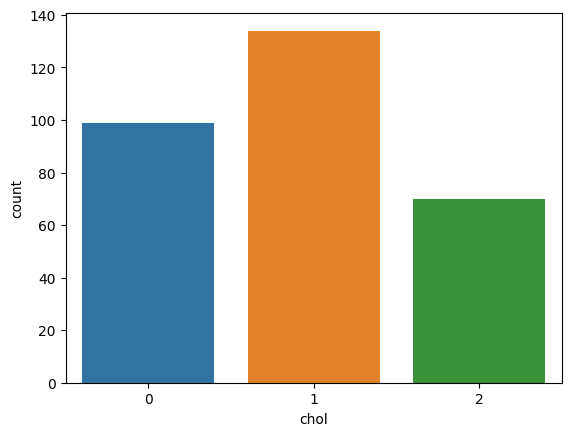

In [93]:
#graficamos
sns.countplot(dfheart, x='chol')
plt.show()

Seguiremos con la columna "age"

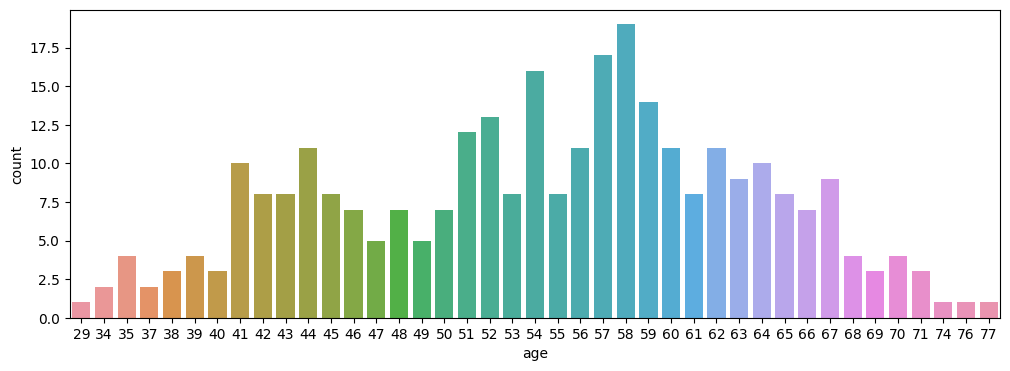

In [94]:
fig = plt.figure(figsize=(12,4))
sns.countplot(dfheart, x='age')
plt.show()

vamos a normalizar los datos de la columna 'age' de tal manera que:

0 = los valores debajo de 46

1 = los valores entre 46 y 59

2 = los valores mayores a 59

In [95]:
dfheart.loc[dfheart['age'] < 45 , 'age'] = 0

In [96]:
dfheart.loc[(dfheart['age'] >= 45 ) & (dfheart['age'] <= 59), 'age'] = 1

In [97]:
dfheart.loc[dfheart['age'] >= 60 , 'age'] = 2

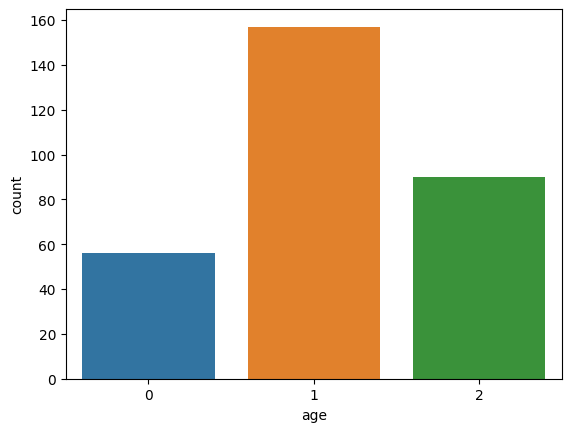

In [98]:
sns.countplot(dfheart, x='age')
plt.show()

Seguiremos con la columna thalach

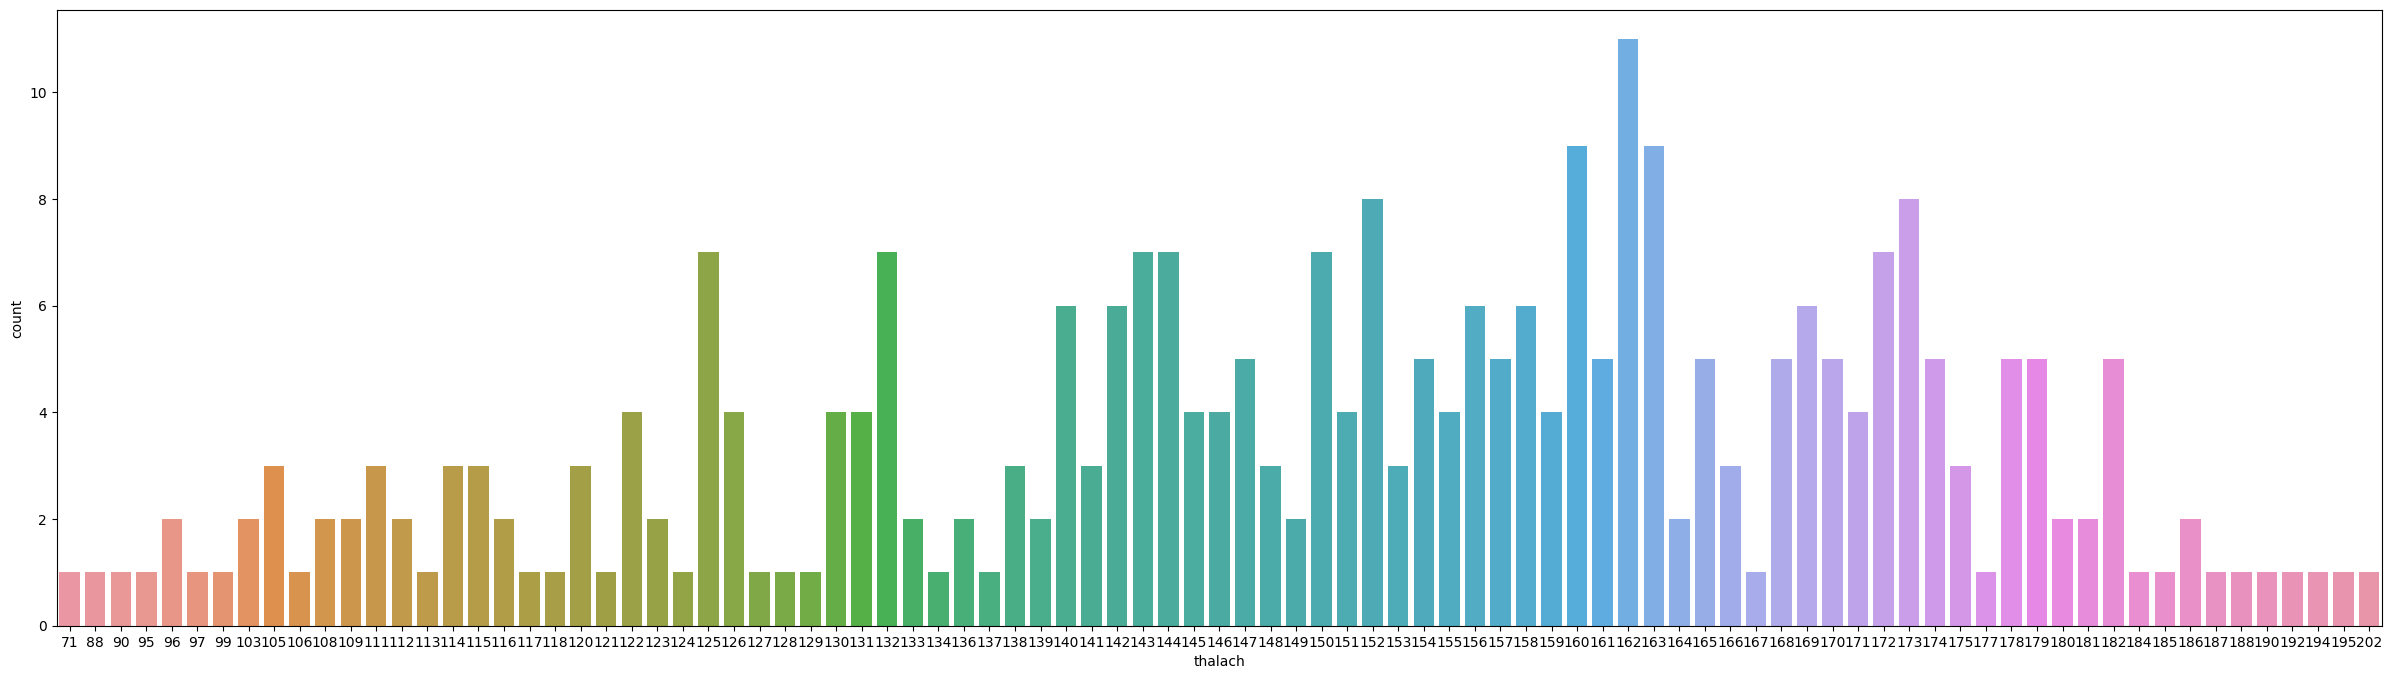

In [99]:
fig = plt.figure(figsize=(30,8))
sns.countplot(dfheart, x='thalach')
plt.show()

Como vemos tiene muchas variables unicas, lo que procederemos a realizar el mismo procedimiento que la segunda columna.

In [100]:
dfheart['thalach'].min()

71

In [101]:
dfheart['thalach'].max()

202

In [102]:
dfheart['thalach'].count()

303

In [103]:
dfheart.loc[dfheart['thalach'] <= 120,'thalach'] = 0

In [104]:
dfheart.loc[(dfheart['thalach'] > 120) & (dfheart['thalach'] <= 150),'thalach'] = 1

In [105]:
dfheart.loc[dfheart['thalach'] > 150,'thalach'] = 2

Ahora finalizaremos con la columna oldpeak

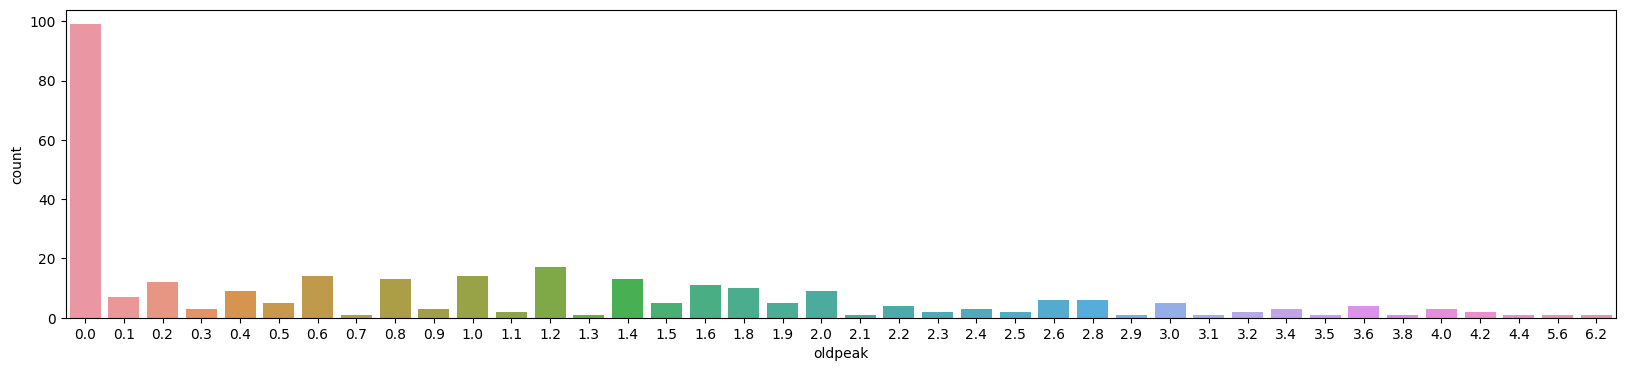

In [106]:
fig = plt.figure(figsize=(20,4))
sns.countplot(dfheart, x='oldpeak')
plt.show()

comenzaremos la normalización

In [107]:
dfheart.loc[dfheart['oldpeak'] == 0,'oldpeak'] = 0

In [108]:
dfheart.loc[(dfheart['oldpeak'] > 0) & (dfheart['oldpeak'] < 2),'oldpeak'] = 1

In [109]:
dfheart.loc[dfheart['oldpeak'] >= 2,'oldpeak'] = 2

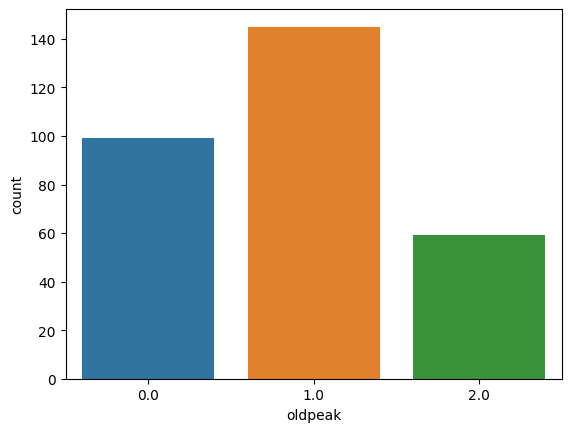

In [110]:
sns.countplot(dfheart, x='oldpeak')
plt.show()

cambiamos el tipo de dato

In [111]:
dfheart['oldpeak'] = dfheart['oldpeak'].astype(int)

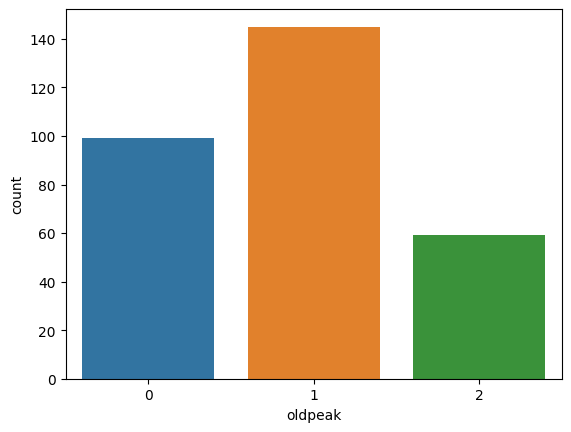

In [112]:
sns.countplot(dfheart, x='oldpeak')
plt.show()

In [113]:
dfheart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,3,2,1,1,0,1,0,2,0,0,1,1
1,0,1,2,1,1,0,1,2,0,2,0,0,2,1
2,0,0,1,1,0,0,0,2,0,1,2,0,2,1
3,1,1,1,0,1,0,1,2,0,1,2,0,2,1
4,1,0,0,0,2,0,1,2,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,0,2,1,0,1,1,1,1,1,0,3,0
299,1,1,3,0,1,0,1,1,0,1,1,0,3,0
300,2,1,0,2,0,1,1,1,0,2,1,2,3,0
301,1,1,0,1,0,0,1,0,1,1,1,1,3,0


Realizaremos el siguiente analisis:

A modo de análisis, debe identificar si el dataset se encuentra correctamente balanceado (entre pacientes con y sin enfermedad cardíaca), y como está balanceado el dataset en cuanto a género y edad (este análisis es unicamente a modo informativo).

Ahora veremos si el dataset se escuentra balanceado entre pasientes con y sin enfermedades cardiacas:

In [114]:
dfheart['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

No hay demasiada diferencia en la cantidad de pasientes con y sin enfermedades cardiacas.

In [115]:
dfheart['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

Aqui vemos una amplia diferencia entre la gran cantidad de hombres y la poca cantidad de mujeres.

Y en cuanto a las diferencia de edad, se ve un gran incremento de casos apartir de los 40 años que comienza a decaer apartir de los 68 años.

**Bien comencemos con el desarrollo del modelo de machine learning**

comenzaremos dividiendo las variables X e Y.

In [116]:
x = dfheart.iloc[:,:-1].values

In [117]:
y = dfheart["target"].values

In [118]:
#importamos train test split para la separacion de los datos
from sklearn.model_selection import train_test_split

#realizamos la separacion de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [119]:
#importamos los modelos de random forest y Knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Instanciamos los modelos
rf_model = RandomForestClassifier()
Knn_model = KNeighborsClassifier()

Para encontrar los mejores hiperparametros utilizaremos **GridSearchCV**

In [120]:
#importamos GridSearchCV
from sklearn.model_selection import GridSearchCV

In [121]:
#definimos los parametros de busqueda
rf_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [122]:
#preparamos los modelos de GridSearchCV
grid_rf = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn = GridSearchCV(Knn_model,knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [123]:
#Entrenamos los modelos
grid_rf.fit(x_train,y_train)
grid_knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [124]:
#Imprimimos los mejores parametros con la mejores puntuaciones
print('Mejores hiperparametros: ',grid_rf.best_params_)
print('Score: ', grid_rf.best_score_)

Mejores hiperparametros:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 10}
Score:  0.8428571428571429


Aqui vemos que este modelo con los mejores parametros supera el objetivo de este proyecto, pero probemos con el modelo de vecinos cercanos

In [125]:
print('Mejores hiperparametros knn: ', grid_knn.best_params_)
print('Score: ', grid_knn.best_score_)

Mejores hiperparametros knn:  {'n_neighbors': 7, 'weights': 'uniform'}
Score:  0.797704081632653


Vemos que por poco casi llegamos al score objetivo

Ahora realizaremos la prediccion y evaluaremos con la metrica accuracy

In [133]:
#importamos accuracy_score
from sklearn.metrics import accuracy_score

y_pred_rf = grid_rf.predict(x_test)
y_pred_knn= grid_knn.predict(x_test)

In [135]:
#ahora observamos los scores
print('score de rf: ',accuracy_score(y_test,y_pred_rf))
print('score de knn: ',accuracy_score(y_test,y_pred_knn))

score de rf:  0.8688524590163934
score de knn:  0.8524590163934426


Vemos que los dos Modelos superan el score objetivo

**Veamos que nos muestra la Matriz de confusion:**

In [136]:
#importamos la matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_cm = confusion_matrix(y_test,y_pred_rf)
knn_cm = confusion_matrix(y_test,y_pred_knn)

rf_cmd = ConfusionMatrixDisplay(rf_cm)
knn_cmd = ConfusionMatrixDisplay(knn_cm)

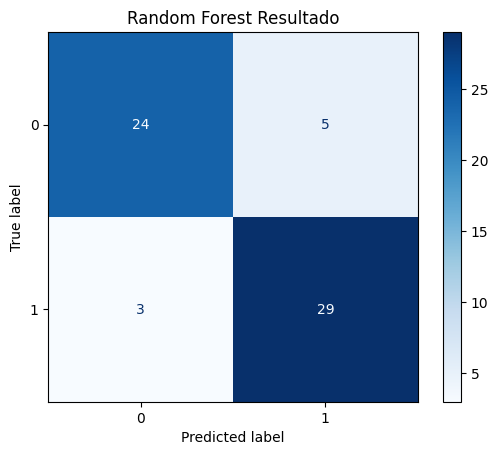

In [138]:
#realizamos el grafico, primero de la rf_cmd
rf_cmd.plot(cmap='Blues')
plt.title("Random Forest Resultado")
plt.show()

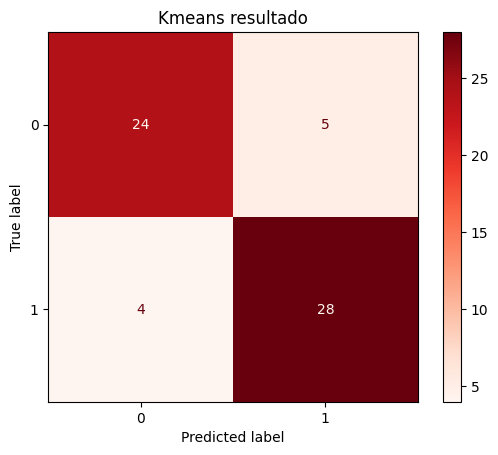

In [139]:
knn_cmd.plot(cmap="Reds")
plt.title("Kmeans resultado")
plt.show()

Podriamos obtener mejores modelos realizando una mejor normalizacion de datos y modificando aun mas los parametros, pero habienndo llegado al objetivo del curso doy por finalizado este proyecto.

In [140]:
print("Fin")

Fin
